In [1]:
## Conv MNIST Dataset to Bin File

In [1]:
#bin_location = r"C:\Users\Baron\Documents\Grad_School\EE_278\Projects\EE278_term_project\mnist_bin"

In [2]:
import os
import cv2
import numpy as np

import shutil

def preprocess_image(image_path, output_dir):
    try:
        # Dynamically create the .bin file name
        output_name = os.path.splitext(os.path.basename(image_path))[0] + ".bin"
        output_path = os.path.join(output_dir, output_name)

        # Ensure the output directory exists
        os.makedirs(output_dir, exist_ok=True)

        # Load the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f"Error: Could not load image from '{image_path}'. Ensure it is a valid file.")

        # Resize the image to 32x32
        img_resized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)

        # Normalize pixel values to [0, 1]
        img_normalized = img_resized / 255.0

        # Flatten the image to a 1D array
        img_flattened = img_normalized.flatten()

        # Write the binary file
        with open(output_path, 'wb') as bin_file:
            img_flattened.astype('float32').tofile(bin_file)

        print(f"Preprocessed image saved to '{output_path}'.")

    except Exception as e:
        print(f"Error during preprocessing: {e}")

In [3]:
os.environ["PATH_EE278"] = "C:/Users/Baron/Desktop/EE_278_Repo/EE_278/"


In [4]:
# Example usage
num_location = r"C:\Users\Baron\Desktop\EE_278_Repo\EE_278\%PATH_EE278%\EE278_env\pictures\img_9.jpg"
bin_location = r"C:/Users/Baron/Desktop/EE_278_Repo/EE_278/%PATH_EE278%/EE278_env/bin_files"

preprocess_image(num_location, bin_location)

Preprocessed image saved to 'C:/Users/Baron/Desktop/EE_278_Repo/EE_278/%PATH_EE278%/EE278_env/bin_files\img_9.bin'.


In [5]:
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt

def read_and_display_binary_image(bin_path, shape=(32, 32)):
    """
    Reads a binary file, reshapes it into an image, and displays it using matplotlib.
    
    Parameters:
        bin_path (str): Path to the binary file to be read.
        shape (tuple): Shape to reshape the flat array into (default: (32, 32)).
    
    Returns:
        np.ndarray: The reshaped array containing the image data.
    """
    try:
        # Check if the file exists
        if not os.path.exists(bin_path):
            raise FileNotFoundError(f"Error: The file '{bin_path}' does not exist.")

        # Read the binary file into a NumPy array
        data = np.fromfile(bin_path, dtype='float32')

        # Check if the data can be reshaped to the specified shape
        if data.size != np.prod(shape):
            raise ValueError(f"Error: Data size {data.size} does not match the expected shape {shape}.")

        # Reshape the data to the specified shape
        image = data.reshape(shape)
        
        # Display the image using matplotlib
        plt.imshow(image, cmap='gray')
        plt.title("Binary Image")
        plt.colorbar()  # Optional: show pixel intensity scale
        plt.show()

        print(f"Binary image from '{bin_path}' successfully displayed.")
        return image

    except Exception as e:
        print(f"Error reading or displaying binary file: {e}")
        return None

In [6]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_278_Repo\\EE_278\\%PATH_EE278%\\EE278_env\\Assignments'

In [8]:
cd ..

C:\Users\Baron\Desktop\EE_278_Repo\EE_278\%PATH_EE278%\EE278_env


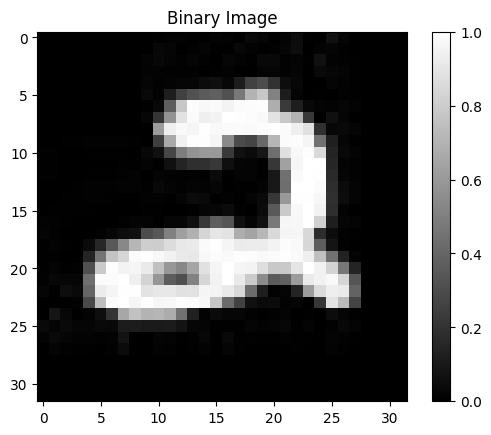

Binary image from 'bin_files/img_2.bin' successfully displayed.
Image Array:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# Path to the binary file
bin_path = 'bin_files/img_2.bin'

# Read the binary file and reshape it to (32, 32)
image_array = read_and_display_binary_image(bin_path, shape=(32, 32))

# Check the content if successfully read
if image_array is not None:
    print("Image Array:")
    print(image_array)

In [10]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_278_Repo\\EE_278\\%PATH_EE278%\\EE278_env'

In [11]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B426-88EF

 Directory of C:\Users\Baron\Desktop\EE_278_Repo\EE_278\%PATH_EE278%\EE278_env

11/22/2024  10:03 PM    <DIR>          .
09/28/2024  01:15 PM    <DIR>          ..
09/28/2024  01:27 PM    <DIR>          .ipynb_checkpoints
11/25/2024  10:32 PM    <DIR>          Assignments
11/22/2024  09:56 PM    <DIR>          bin_files
09/28/2024  01:52 PM    <DIR>          File Transfer
09/28/2024  01:15 PM    <DIR>          Include
11/23/2024  12:15 AM           270,344 lenet_weights.h5
09/28/2024  01:15 PM    <DIR>          Lib
11/22/2024  03:01 PM    <DIR>          pictures
09/28/2024  01:15 PM               259 pyvenv.cfg
09/28/2024  01:15 PM    <DIR>          Scripts
11/22/2024  10:05 PM    <DIR>          weights
               2 File(s)        270,603 bytes
              11 Dir(s)  195,468,378,112 bytes free


In [12]:
from PIL import Image

def check_image_dimensions(image_path):
    # Open the image using PIL
    with Image.open(image_path) as img:
        # Get the dimensions of the image (width, height)
        width, height = img.size

    # Check if the image is 28x28 or 32x32
    if width == 28 and height == 28:
        return "The image is 28x28 pixels."
    elif width == 32 and height == 32:
        return "The image is 32x32 pixels."
    else:
        return f"The image is {width}x{height} pixels, which is neither 28x28 nor 32x32."

# Example usage:
image_path = 'pictures/img_0.jpg'  # Provide the correct image path
print(check_image_dimensions(image_path))

The image is 28x28 pixels.


In [13]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_278_Repo\\EE_278\\%PATH_EE278%\\EE278_env'

Epoch 1/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.7571 - accuracy: 0.9239 - val_loss: 0.3752 - val_accuracy: 0.9617
Epoch 2/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.3659 - accuracy: 0.9572 - val_loss: 0.3584 - val_accuracy: 0.9531
Epoch 3/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3250 - accuracy: 0.9620 - val_loss: 0.2956 - val_accuracy: 0.9686
Epoch 4/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.3013 - accuracy: 0.9633 - val_loss: 0.2716 - val_accuracy: 0.9732
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2806 - accuracy: 0.9660 - val_loss: 0.2670 - val_accuracy: 0.9676
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2670 - accuracy: 0.9675 - val_loss: 0.2472 - val_accuracy: 0.9710
Epoch 7/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2545 - accuracy: 0.9691 - val_loss: 0.2670 -

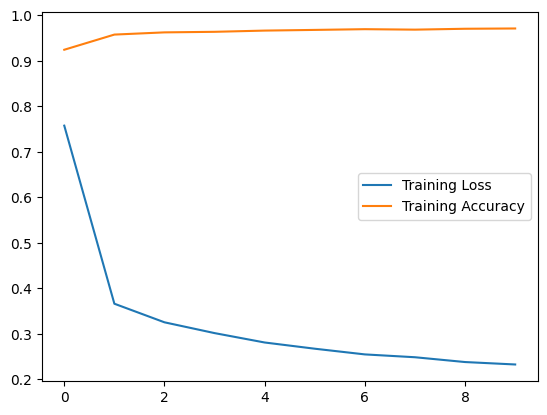

313/313 - 4s - loss: 0.2168 - accuracy: 0.9738 - 4s/epoch - 12ms/step
Test Loss: 0.21679484844207764, Test Accuracy: 0.973800003528595


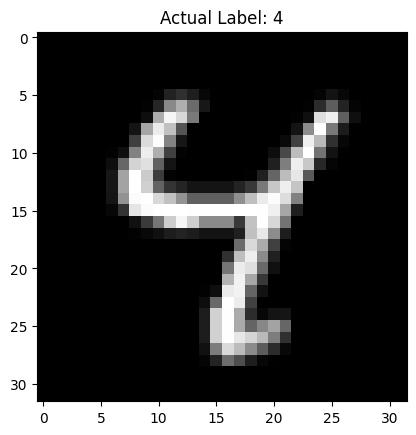

1/1 [==============================] - 0s 241ms/step
Predicted: 4, Actual: 4
All weights and biases saved as .bin files.
Weights saved to weights/lenet_weights_new.hdf5


In [14]:
import os
import numpy as np
from tensorflow.keras import models, layers, datasets

# Create directories for saving weights and biases
def create_output_dirs(output_dir):
    os.makedirs(output_dir, exist_ok=True)

# Save weights and biases as .bin files
def save_weights_as_bin(model, output_dir):
    # Layer mapping
    layer_map = {
        "conv1": 0,  # First Conv2D layer
        "conv2": 2,  # Second Conv2D layer
        "fc1": 5,    # First Dense layer
        "fc2": 6,    # Second Dense layer
        "fc3": 7     # Output Dense layer
    }

# Preprocess the MNIST dataset
def preprocess_mnist():
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

    # Normalize pixel values to [0, 1]
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Resize each image to 32x32 using cv2.INTER_AREA (better for downsampling)
    x_train_resized = np.array([cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA) for img in x_train])
    x_test_resized = np.array([cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA) for img in x_test])

    # Add a channel dimension (32x32x1)
    x_train = x_train_resized.reshape(-1, 32, 32, 1)
    x_test = x_test_resized.reshape(-1, 32, 32, 1)

    return x_train, y_train, x_test, y_test

# Build the LeNet model
def build_lenet():
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='relu', kernel_regularizer='l2', input_shape=(32, 32, 1)),
        layers.MaxPool2D(pool_size=2),
        layers.Conv2D(16, kernel_size=5, activation='relu', kernel_regularizer='l2'),
        layers.MaxPool2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(120, activation='relu', kernel_regularizer='l2'),
        layers.Dense(84, activation='relu', kernel_regularizer='l2'),
        layers.Dense(10, activation='softmax'),
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model and save weights
def train_and_save():
    # Preprocess data
    x_train, y_train, x_test, y_test = preprocess_mnist()

    # Build the LeNet model
    model = build_lenet()

    # Train the model
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.legend()
    plt.show()

    # Evaluate the model (optional)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
    

    # Visualize a test image and prediction
    test_image = x_test[6].reshape(1, 32, 32, 1)  # Ensure correct shape
    plt.imshow(x_test[6].reshape(32, 32), cmap='gray')
    plt.title(f"Actual Label: {y_test[6]}")
    plt.show()
    
    prediction = model.predict(test_image)
    print(f"Predicted: {np.argmax(prediction)}, Actual: {y_test[6]}")

    # Save the weights and biases as .bin files
    output_dir = "bin_files/"
    create_output_dirs(output_dir)
    #save_weights_as_bin(model, output_dir)
    layer_map = {
        "conv1": 0,  # First Conv2D layer
        "conv2": 2,  # Second Conv2D layer
        "fc1": 5,    # First Dense layer
        "fc2": 6,    # Second Dense layer
        "fc3": 7     # Output Dense layer
    }

    #---------------------------------------------------------------------------------------
    # Save Conv1 weights and biases
    conv1_weights, conv1_bias = model.layers[layer_map["conv1"]].get_weights()
    conv1_weights.flatten().astype('float32').tofile(os.path.join(output_dir, "conv1_filters.bin"))
    conv1_bias.flatten().astype('float32').tofile(os.path.join(output_dir, "conv1_bias.bin"))

    # Save Conv2 weights and biases
    conv2_weights, conv2_bias = model.layers[layer_map["conv2"]].get_weights()
    conv2_weights.flatten().astype('float32').tofile(os.path.join(output_dir, "conv2_filters.bin"))
    conv2_bias.flatten().astype('float32').tofile(os.path.join(output_dir, "conv2_bias.bin"))

    # Save Fully Connected (fc1) weights and biases
    fc1_weights, fc1_bias = model.layers[layer_map["fc1"]].get_weights()
    fc1_weights.flatten().astype('float32').tofile(os.path.join(output_dir, "fc1_weights.bin"))
    fc1_bias.flatten().astype('float32').tofile(os.path.join(output_dir, "fc1_bias.bin"))

    # Save Fully Connected (fc2) weights and biases
    fc2_weights, fc2_bias = model.layers[layer_map["fc2"]].get_weights()
    fc2_weights.flatten().astype('float32').tofile(os.path.join(output_dir, "fc2_weights.bin"))
    fc2_bias.flatten().astype('float32').tofile(os.path.join(output_dir, "fc2_bias.bin"))

    # Save Fully Connected (fc3) weights and biases
    fc3_weights, fc3_bias = model.layers[layer_map["fc3"]].get_weights()
    fc3_weights.flatten().astype('float32').tofile(os.path.join(output_dir, "fc3_weights.bin"))
    fc3_bias.flatten().astype('float32').tofile(os.path.join(output_dir, "fc3_bias.bin"))
    print("All weights and biases saved as .bin files.")
    #---------------------------------------------------------------------------------------


    # Save the model weights in HDF5 format
    # Save the model weights in HDF5 format
    hdf5_file = "weights/lenet_weights_new.hdf5"
    model.save_weights(hdf5_file)
    print(f"Weights saved to {hdf5_file}")


# Run the training and save the weights-
train_and_save()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import models

# Load the saved model and weights
MODEL_WEIGHTS_FILE = "weights/lenet_weights_new.hdf5"

def build_lenet():
    """Rebuild the LeNet model architecture."""
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='relu', kernel_regularizer='l2', input_shape=(32, 32, 1)),
        layers.MaxPool2D(pool_size=2),
        layers.Conv2D(16, kernel_size=5, activation='relu', kernel_regularizer='l2'),
        layers.MaxPool2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(120, activation='relu', kernel_regularizer='l2'),
        layers.Dense(84, activation='relu', kernel_regularizer='l2'),
        layers.Dense(10, activation='softmax'),
    ])
    return model

# Load the model
model = build_lenet()
model.load_weights(MODEL_WEIGHTS_FILE)
print("Model weights loaded successfully.")

# Function to preprocess an input image
def preprocess_image(image_path):
    """Preprocess an input image for prediction."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    img_resized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)  # Resize to 32x32
    img_normalized = img_resized / 255.0  # Normalize pixel values
    img_reshaped = img_normalized.reshape(1, 32, 32, 1)  # Add batch and channel dimensions
    return img_reshaped

# Function to predict a single image
def predict_image(model, image_path):
    """Predict the label for a single image using the trained model."""
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction)

    # Display the image
    plt.imshow(preprocessed_image.reshape(32, 32), cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Confidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()

    return predicted_label, confidence


Model weights loaded successfully.


In [16]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B426-88EF

 Directory of C:\Users\Baron\Desktop\EE_278_Repo\EE_278\%PATH_EE278%\EE278_env

11/22/2024  10:03 PM    <DIR>          .
09/28/2024  01:15 PM    <DIR>          ..
09/28/2024  01:27 PM    <DIR>          .ipynb_checkpoints
11/26/2024  01:48 PM    <DIR>          Assignments
11/22/2024  09:56 PM    <DIR>          bin_files
09/28/2024  01:52 PM    <DIR>          File Transfer
09/28/2024  01:15 PM    <DIR>          Include
11/23/2024  12:15 AM           270,344 lenet_weights.h5
09/28/2024  01:15 PM    <DIR>          Lib
11/22/2024  03:01 PM    <DIR>          pictures
09/28/2024  01:15 PM               259 pyvenv.cfg
09/28/2024  01:15 PM    <DIR>          Scripts
11/22/2024  10:05 PM    <DIR>          weights
               2 File(s)        270,603 bytes
              11 Dir(s)  195,429,687,296 bytes free


1/1 [==============================] - 0s 169ms/step


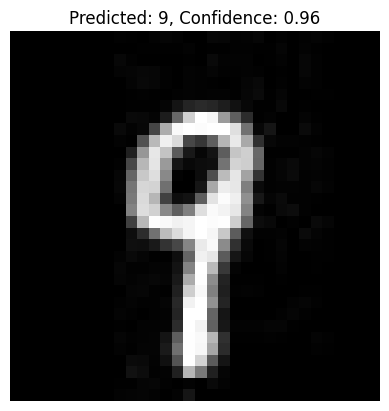

Predicted Label: 9, Confidence: 0.96


In [17]:
# Test the function with a new image
TEST_IMAGE_PATH = "pictures/img_9.jpg"  # Replace with the path to your test image
predicted_label, confidence = predict_image(model, TEST_IMAGE_PATH)
print(f"Predicted Label: {predicted_label}, Confidence: {confidence:.2f}")

### Pure Debug

In [18]:
import numpy as np
input_image = np.fromfile("bin_files/img_9.bin", dtype=np.float32)
print("Python input (first 10 values):", input_image[:20])

Python input (first 10 values): [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00784314 0.00392157 0.
 0.01176471 0.01960784 0.01176471 0.         0.         0.02745098
 0.02352941 0.00784314]


In [19]:
conv1_weights, conv1_bias = model.layers[0].get_weights()
print("Python Conv1 weights (first 5):", conv1_weights.flatten()[:5])
print("Python Conv1 bias (first 5):", conv1_bias[:5])

Python Conv1 weights (first 5): [ 0.00537475 -0.01142931 -0.06441899  0.01086463  0.10696756]
Python Conv1 bias (first 5): [-0.00034385  0.01645515  0.00172529 -0.05721566  0.06817765]


In [20]:
import numpy as np
input_image = np.fromfile("bin_files/img_9.bin", dtype=np.float32).reshape(32, 32, 1)
conv1_model = models.Model(inputs=model.input, outputs=model.layers[0].output)  # Extract Conv1
conv1_output = conv1_model.predict(input_image[np.newaxis, ...])
print("Python Conv1 output (first 20 values):", conv1_output.flatten()[:20])


1/1 [==============================] - 0s 110ms/step
Python Conv1 output (first 20 values): [0.         0.01645515 0.00172529 0.         0.06817765 0.00235096
 0.         0.01645515 0.00172529 0.         0.06817765 0.00235096
 0.         0.01645515 0.00172529 0.         0.06817765 0.00235096
 0.         0.01645515]


In [22]:
import numpy as np

def convert_binary_to_npy(binary_file_path, npy_file_path, array_shape):
    # Load data from the binary file
    data = np.fromfile(binary_file_path, dtype=np.float32)  # Assuming float32 data type

    # Reshape to the expected shape
    reshaped_data = data.reshape(array_shape)

    # Save to .npy format
    np.save(npy_file_path, reshaped_data)
    print(f"Binary file converted to .npy and saved to: {npy_file_path}")

# Example usage:
binary_file = "bin_files/img_9.bin"
npy_file = "npy/img_9.npy"
shape = (32, 32)  # Adjust shape based on your data, e.g., input image size

convert_binary_to_npy(binary_file, npy_file, shape)

Binary file converted to .npy and saved to: npy/img_9.npy


In [27]:
import tensorflow as tf
import numpy as np
MODEL_WEIGHTS_FILE = "weights/lenet_weights_new.hdf5"
# Load the saved model and weights
MODEL_WEIGHTS_FILE = "weights/lenet_weights_new.hdf5"

def build_lenet():
    """Rebuild the LeNet model architecture."""
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='relu', kernel_regularizer='l2', input_shape=(32, 32, 1)),
        layers.MaxPool2D(pool_size=2),
        layers.Conv2D(16, kernel_size=5, activation='relu', kernel_regularizer='l2'),
        layers.MaxPool2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(120, activation='relu', kernel_regularizer='l2'),
        layers.Dense(84, activation='relu', kernel_regularizer='l2'),
        layers.Dense(10, activation='softmax'),
    ])
    return model

# Load the model
model = build_lenet()
model.load_weights(MODEL_WEIGHTS_FILE)
print("Model weights loaded successfully.")

# Take a single input sample
x_train_sample = np.load('npy/img_9.npy')  # Load your input sample (e.g., img_9.bin in numpy format)
x_train_sample = x_train_sample.reshape(1, 32, 32, 1)  # Reshape for model input

# Extract Conv1 layer output
conv1_output = model.layers[0](x_train_sample).numpy()  # Assuming the first layer is Conv1

# Print the first 5 values for comparison
print("Conv1 output (first 5):", conv1_output.flatten()[:20])

Model weights loaded successfully.
Conv1 output (first 5): [0.         0.01645515 0.00172529 0.         0.06817765 0.00235096
 0.         0.01645515 0.00172529 0.         0.06817765 0.00235096
 0.         0.01645515 0.00172529 0.         0.06817765 0.00235096
 0.         0.01645515]


### conv2d_python

In [28]:
import numpy as np
from scipy.signal import convolve2d

def conv2d_python(input, filters, bias, input_size, filter_size, num_filters):
    input = input.reshape(input_size, input_size)
    filters = filters.reshape(num_filters, filter_size, filter_size)
    output_size = input_size - filter_size + 1
    output = np.zeros((num_filters, output_size, output_size))
    for f in range(num_filters):
        output[f] = convolve2d(input, filters[f], mode='valid') + bias[f]
    return output

# Load binary data and perform the same operation in Python
input = np.fromfile("bin_files/img_5.bin", dtype=np.float32).reshape(32, 32)
filters = np.fromfile("bin_files/conv1_filters.bin", dtype=np.float32)
bias = np.fromfile("bin_files/conv1_bias.bin", dtype=np.float32)

conv1_output = conv2d_python(input, filters, bias, 32, 5, 6)
print("Python Conv1 output (first 10 values):", conv1_output.flatten()[:10])

Python Conv1 output (first 10 values): [-0.00034385 -0.00034385 -0.00034385 -0.00034385 -0.00034385  0.00152037
  0.00222281  0.00341615  0.00091078  0.00132743]
